In [1]:
%matplotlib inline

import umap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

C:\Users\pablo\miniconda3\lib\site-packages\umap\spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [2]:
c_icut = "#e4eaed"
c_icut2 = "#34495e"
c_rxnenum = "#065535"
c_rxnenum = "#cf9b00"
c_dexom = "#e74c3c"
c_maxdist = "#6a3d9a"

m_dexom = 'dexom-default'
m_maxdist = 'dexom-maxdist'
m_icut = 'dexom-icut'
m_rxnenum = 'dexom-rxnenum'

list_methods = [m_dexom, m_maxdist, m_rxnenum, m_icut]
list_colors = [c_dexom, c_maxdist, c_rxnenum, c_icut2]


pal_rxnenum = sns.color_palette([c_icut, c_rxnenum])
pal_dexom = sns.color_palette([c_icut, c_dexom])
pal_maxdist = sns.color_palette([c_icut, c_maxdist])
pal_icut = sns.color_palette([c_icut, c_icut2])

state = np.random.RandomState(seed=42)

In [3]:
def plot_embedding(ax, df_embedding, method, color, title):
    ax.set(aspect='equal')
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df_embedding[['UMAP1','UMAP2']], ax = ax, linewidth=0,
                    alpha=background_alpha, color=c_icut, rasterized=True)
    df = df_embedding[df_embedding.method==method]
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df, ax = ax, linewidth=0, alpha=method_alpha, color=color, rasterized=True)
    ax.set_title(title, fontsize=14)
    
def plot_distances(ax, df_distances, list_methods, list_colors, alpha=0.05):
    for m, c in zip(list_methods, list_colors):
        df_distances.loc[m, :].transpose().plot(color=c, alpha=alpha, legend=False, ax=ax)
        df_distances.loc[m, :].mean(axis=0).plot(color=c, style='--', ax=ax)

## DAG sampling

In [4]:
# NOTE: Results are exported using the exportResults.m script included in DEXOM

df_full_dag = pd.read_csv('results/dag/full/allSolutionsIntVar.csv', header=None)

df_dag_methods = pd.read_csv('results/dag/sampling/allSolutionsIntVar.csv', header=None)
df_labels_dag = pd.read_csv('results/dag/sampling/allSolutionLabels.csv', header=None)

labels = ['full'] * df_full_dag.shape[0] + df_labels_dag.squeeze().values.tolist()

df_all_dag = pd.concat([df_full_dag, df_dag_methods], ignore_index=True)
embedding_dag = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df_all_dag)


df_embedding_dag = pd.DataFrame(embedding_dag, columns=['UMAP1','UMAP2'])
df_embedding_dag['method'] = labels
df_embedding_dag.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1529: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,9.935110,17.592024,full
1,8.301420,13.872597,full
2,10.009578,17.682180,full
3,10.001393,17.680794,full
4,10.000808,17.602768,full


In [5]:
mean_dist = pd.read_csv('results/dag/sampling/mean_dist.csv', header=None)
mean_nn_dist = pd.read_csv('results/dag/sampling/mean_nn_dist.csv', header=None)
method_labels = pd.read_csv('results/dag/sampling/dist_labels.csv', header=None)


list_labels = method_labels.squeeze().values.tolist()

df_mean = mean_dist.transpose()
df_mean.columns = list_labels
df_mean = df_mean.transpose().loc[:, 10:]

df_nn_mean = mean_nn_dist.transpose()
df_nn_mean.columns = list_labels
df_nn_mean = df_nn_mean.transpose().loc[:, 10:]

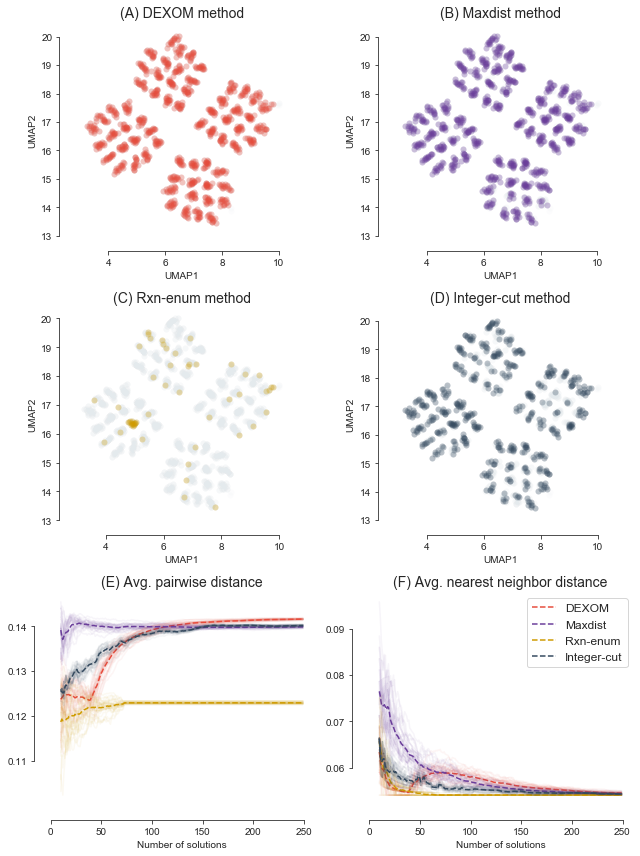

In [6]:
sns.set_style("ticks")

df_embedding = df_embedding_dag

fig, axs = plt.subplots(3, 2, figsize=(9, 12), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, m_dexom, c_dexom, '(A) DEXOM method')

ax = axs[0,1]
plot_embedding(ax, df_embedding, m_maxdist, c_maxdist, '(B) Maxdist method')

ax = axs[1,0]
plot_embedding(ax, df_embedding, m_rxnenum, c_rxnenum, '(C) Rxn-enum method')

ax = axs[1,1]
plot_embedding(ax, df_embedding, m_icut, c_icut2, '(D) Integer-cut method')

# Plot the distance
ax = axs[2,0]

alpha = 0.05
#ax.set_ylim([0.080, 0.100])
plot_distances(ax, df_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(E) Avg. pairwise distance', fontsize=14)
ax.set_xlabel('Number of solutions')

ax = axs[2,1]
#ax.set_ylim([0.045, 0.08])
plot_distances(ax, df_nn_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(F) Avg. nearest neighbor distance', fontsize=14)
ax.set_xlabel('Number of solutions')

# Create a custom legend
l1 = mlines.Line2D([], [], color=c_dexom, linestyle='--', label='DEXOM')
l2 = mlines.Line2D([], [], color=c_maxdist, linestyle='--', label='Maxdist')
l3 = mlines.Line2D([], [], color=c_rxnenum, linestyle='--', label='Rxn-enum')
l4 = mlines.Line2D([], [], color=c_icut2, linestyle='--', label='Integer-cut')
ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]

sns.despine(offset=15, trim=True);
plt.tight_layout()
fig.savefig('figures/dag1024.pdf')

## Yeast Random

In [7]:
folder = 'rand120x2'


df = pd.read_csv('results/yeast/random/{}/allSolutionsIntVar.csv'.format(folder), header=None)
df_labels = pd.read_csv('results/yeast/random/{}/allSolutionLabels.csv'.format(folder), header=None)

state = np.random.RandomState(seed=42)
embedding = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df)

df_embedding = pd.DataFrame(embedding, columns=['UMAP1','UMAP2'])
df_embedding['method'] = df_labels.squeeze().values.tolist()
df_embedding.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1529: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,13.021479,7.324783,cobra-imat/random
1,4.087590,6.207263,cobra-imat/random
2,9.925431,6.479264,cobra-imat/random
3,9.581128,8.843873,cobra-imat/random
4,11.859126,9.254138,cobra-imat/random


In [8]:
df_embedding.method.unique()

array(['cobra-imat/random', 'dexom-default', 'dexom-maxdist',
       'dexom-icut'], dtype=object)

In [9]:
mean_dist = pd.read_csv('results/yeast/random/{}/mean_dist.csv'.format(folder), header=None)
mean_nn_dist = pd.read_csv('results/yeast/random/{}/mean_nn_dist.csv'.format(folder), header=None)
method_labels = pd.read_csv('results/yeast/random/{}/dist_labels.csv'.format(folder), header=None)


list_labels = method_labels.squeeze().values.tolist()

df_mean = mean_dist.transpose()
df_mean.columns = list_labels
df_mean = df_mean.transpose().loc[:, 10:]

df_nn_mean = mean_nn_dist.transpose()
df_nn_mean.columns = list_labels
df_nn_mean = df_nn_mean.transpose().loc[:, 10:]

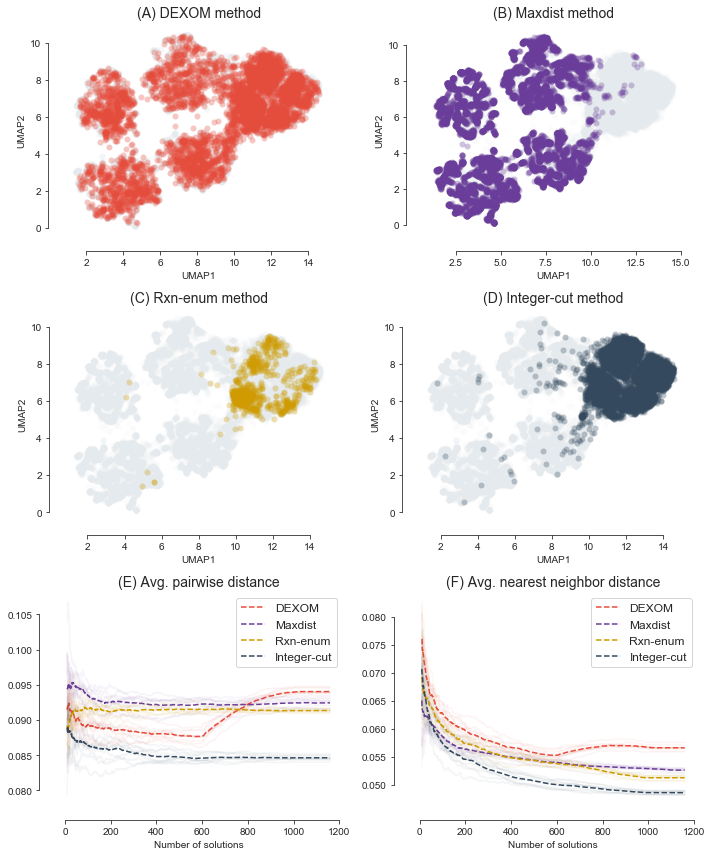

In [10]:
sns.set_style("ticks")

m_dexom = 'dexom-default'
m_maxdist = 'dexom-maxdist'
m_icut = 'dexom-icut'
m_rxnenum = 'cobra-imat/random'
#m_rxnenum = 'dexom-rxnenum'

list_methods = [m_dexom, m_maxdist, m_rxnenum, m_icut]

fig, axs = plt.subplots(3, 2, figsize=(10, 12), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, m_dexom, c_dexom, '(A) DEXOM method')

ax = axs[0,1]
plot_embedding(ax, df_embedding, m_maxdist, c_maxdist, '(B) Maxdist method')

ax = axs[1,0]
plot_embedding(ax, df_embedding, m_rxnenum, c_rxnenum, '(C) Rxn-enum method')

ax = axs[1,1]
plot_embedding(ax, df_embedding, m_icut, c_icut2, '(D) Integer-cut method')

# Plot the distance
ax = axs[2,0]

alpha = 0.05
#ax.set_ylim([0.080, 0.100])
plot_distances(ax, df_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(E) Avg. pairwise distance', fontsize=14)
ax.set_xlabel('Number of solutions')
ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]
#ax.set_ylim([0.045, 0.08])
plot_distances(ax, df_nn_mean, list_methods, list_colors, alpha=alpha)
ax.set_title('(F) Avg. nearest neighbor distance', fontsize=14)
ax.set_xlabel('Number of solutions')

# Create a custom legend
l1 = mlines.Line2D([], [], color=c_dexom, linestyle='--', label='DEXOM')
l2 = mlines.Line2D([], [], color=c_maxdist, linestyle='--', label='Maxdist')
l3 = mlines.Line2D([], [], color=c_rxnenum, linestyle='--', label='Rxn-enum')
l4 = mlines.Line2D([], [], color=c_icut2, linestyle='--', label='Integer-cut')
ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

ax = axs[2,1]

sns.despine(offset=15, trim=True);
plt.tight_layout()

fig.savefig('figures/{}.pdf'.format(folder))

## Ensembles

Unzipping results in C:\Users\pablo\AppData\Local\Temp\tmp_sx7dnsm


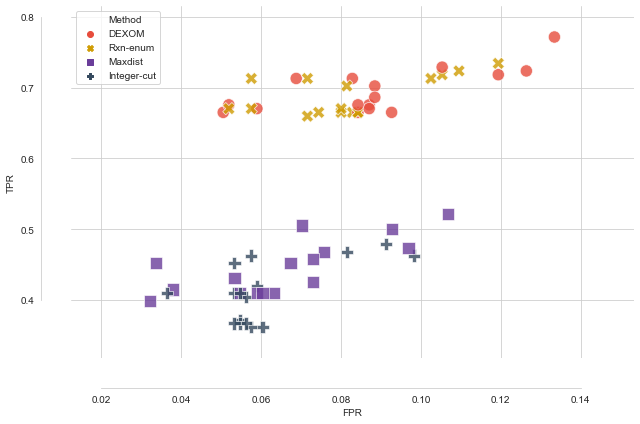

In [11]:
import zipfile
import tempfile

results_zip = 'results/yeast/essential_genes/yeast6-evaluation/dexom-yeast6-eval-export-csv.zip'

with tempfile.TemporaryDirectory() as tmpdir:
    print('Unzipping results in {}'.format(tmpdir))
    with zipfile.ZipFile(results_zip, 'r') as zip_ref:
        zip_ref.extractall(tmpdir)
        df_e = pd.read_csv('{}/dexom-evaluation.csv'.format(tmpdir))
        df_full_eval = pd.read_csv('{}/dexom-evaluation-full-table.csv'.format(tmpdir))
        df_t1_o = pd.read_csv('{}/time_th-0.10-0.90.csv'.format(tmpdir))
        df_t2_o = pd.read_csv('{}/time_th-0.25-0.75.csv'.format(tmpdir))


        
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))

# Rename methods
df_e.Method = df_e.Method.replace('dexom-default/norand', 'DEXOM')
df_e.Method = df_e.Method.replace('dexom-rxnenum/norand', 'Rxn-enum')
df_e.Method = df_e.Method.replace('dexom-maxdist', 'Maxdist')
df_e.Method = df_e.Method.replace('dexom-icut', 'Integer-cut')

colors = {
    'DEXOM': c_dexom,
    'Integer-cut': c_icut2,
    'Maxdist': c_maxdist,
    'Rxn-enum': c_rxnenum
}


fig, ax = plt.subplots(figsize=(9,6))
#ax.plot([0, 1], [0, 1], linestyle='--')
#ax.set_xlim([0, 1.0])
#ax.set_ylim([0.0, 0.85])

sns.scatterplot(x="FPR", y="TPR", hue="Method", style="Method", data=df_e, s=150, alpha=0.8, ax=ax, palette=colors)
sns.despine(offset=30, trim=True)
plt.tight_layout()
fig.savefig('figures/ensembles.pdf', format='pdf')

In [12]:
df_e[df_e.Method == 'DEXOM']

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
0,O2_20.9,full,0.0001,0.10,0.90,DEXOM,or,0.559640,0.791437,0.842222,0.723404,0.126404,136,90,622,52
4,O2_20.9,full,0.0001,0.10,0.85,DEXOM,or,0.587307,0.776488,0.863333,0.675532,0.087079,127,62,650,61
8,O2_20.9,full,0.0001,0.10,0.80,DEXOM,or,0.650404,0.807464,0.885556,0.712766,0.068820,134,49,663,54
12,O2_20.9,full,0.0001,0.10,0.75,DEXOM,or,0.584084,0.770409,0.863333,0.664894,0.084270,125,60,652,63
16,O2_20.9,full,0.0001,0.15,0.90,DEXOM,or,0.597192,0.803212,0.860000,0.728723,0.105337,137,75,637,51
20,O2_20.9,full,0.0001,0.15,0.85,DEXOM,or,0.623882,0.802138,0.874444,0.712766,0.082865,134,59,653,54
24,O2_20.9,full,0.0001,0.15,0.80,DEXOM,or,0.605514,0.793237,0.867778,0.702128,0.088483,132,63,649,56
28,O2_20.9,full,0.0001,0.15,0.75,DEXOM,or,0.651609,0.782089,0.890000,0.664894,0.050562,125,36,676,63
32,O2_20.9,full,0.0001,0.20,0.90,DEXOM,or,0.566324,0.791090,0.846667,0.718085,0.119382,135,85,627,53
36,O2_20.9,full,0.0001,0.20,0.85,DEXOM,or,0.568885,0.767410,0.856667,0.664894,0.092697,125,66,646,63


In [13]:
df_e[(df_e.Thresholds_1 == 0.25) & (df_e.Thresholds_2 == 0.75)]

,Condition,Medium,MinBiomassFlux,Thresholds_1,Thresholds_2,Method,Mode,MCC,F1,Accuracy,TPR,FPR,TP,FP,TN,FN
60,O2_20.9,full,0.0001,0.25,0.75,DEXOM,or,0.592425,0.777502,0.865556,0.675532,0.084270,127,60,652,61
61,O2_20.9,full,0.0001,0.25,0.75,Rxn-enum,or,0.596075,0.775468,0.867778,0.670213,0.080056,126,57,655,62
62,O2_20.9,full,0.0001,0.25,0.75,Maxdist,or,0.417572,0.570478,0.828889,0.409574,0.060393,77,43,669,111
63,O2_20.9,full,0.0001,0.25,0.75,Integer-cut,or,0.430442,0.571509,0.833333,0.409574,0.054775,77,39,673,111


In [14]:
df_full_eval.Method = df_full_eval.Method.replace('dexom-default/norand', 'DEXOM')
df_full_eval.Method = df_full_eval.Method.replace('dexom-rxnenum/norand', 'Rxn-enum')
df_full_eval.Method = df_full_eval.Method.replace('dexom-maxdist', 'Maxdist')
df_full_eval.Method = df_full_eval.Method.replace('dexom-icut', 'Integer-cut')

# Discard the metabolic networks that are not able to make predictions of essential
# genes due to the fact that the biomass reaction has not been included or is blocked.
df_full_eval = df_full_eval[df_full_eval.TPR > 0.1]

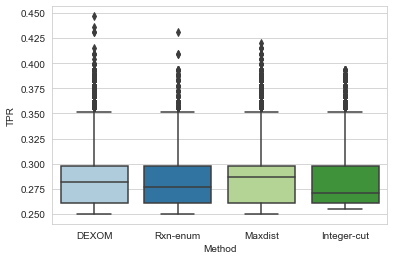

In [15]:
sns.boxplot(x="Method", y="TPR", data=df_full_eval[df_full_eval.Mode == "single"])

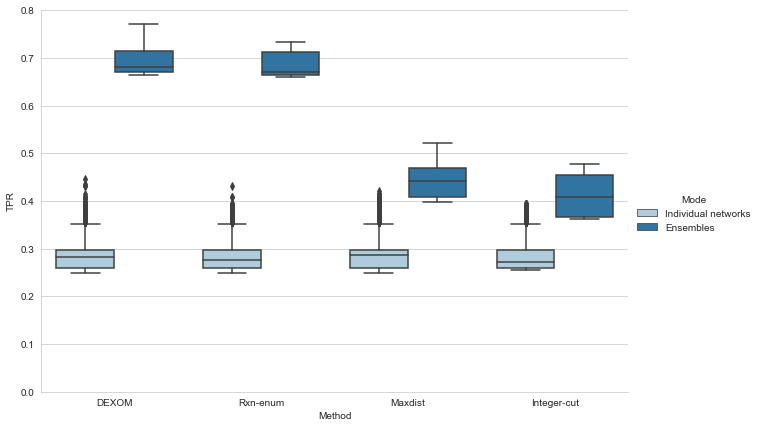

In [16]:
df_e2 = df_full_eval[(df_full_eval.Mode == "single") | (df_full_eval.Mode == "or")].copy()
df_e2.Mode = df_e2.Mode.replace('or', 'Ensembles')
df_e2.Mode = df_e2.Mode.replace('single', 'Individual networks')
fg = sns.catplot(x="Method", y="TPR", hue="Mode", data=df_e2, kind="box", height=6, aspect=1.5);
fg.ax.set_ylim([0.0, 0.8])
fg.savefig('figures/tpr.pdf', format='pdf')

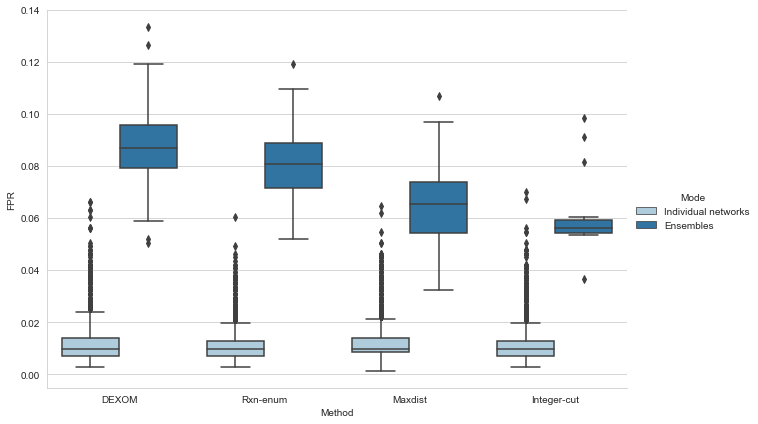

In [17]:
df_e2['specificity'] = 1 - df_e2.FPR
fg = sns.catplot(x="Method", y="FPR", hue="Mode", data=df_e2, kind="box", height=6, aspect=1.5);
fg.savefig('figures/fpr.pdf', format='pdf')

## Time

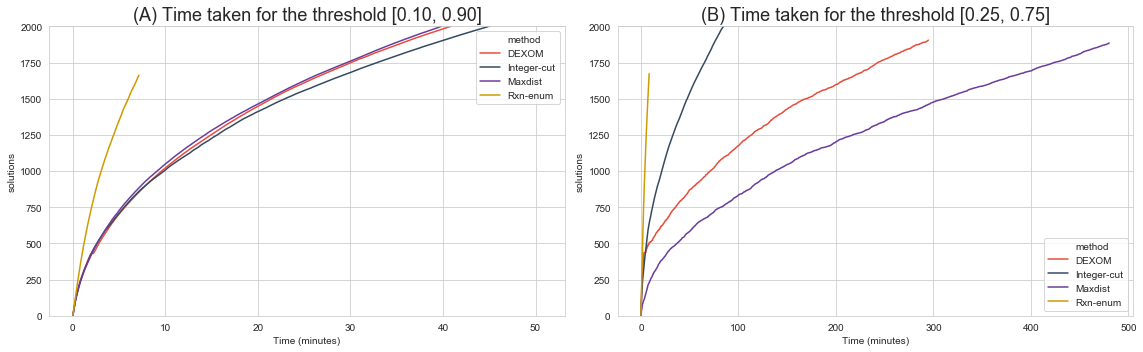

In [18]:
# Plot shows the accepted solutions over time, but this includes duplicated solutions that are 
# only filtered out after the algorithm finishes. Results
df_t1 = df_t1_o.copy()
df_t1.labels = df_t1.labels.replace('dexom-default/norand', 'DEXOM')
df_t1.labels = df_t1.labels.replace('dexom-icut', 'Integer-cut')
df_t1.labels = df_t1.labels.replace('dexom-maxdist', 'Maxdist')
df_t1.labels = df_t1.labels.replace('dexom-rxnenum/norand', 'Rxn-enum')

df_t2 = df_t2_o.copy()
df_t2.labels = df_t2.labels.replace('dexom-default/norand', 'DEXOM')
df_t2.labels = df_t2.labels.replace('dexom-icut', 'Integer-cut')
df_t2.labels = df_t2.labels.replace('dexom-maxdist', 'Maxdist')
df_t2.labels = df_t2.labels.replace('dexom-rxnenum/norand', 'Rxn-enum')

df_t1 = df_t1.rename(columns = {'labels': 'method'})
df_t2 = df_t2.rename(columns = {'labels': 'method'})

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(x='times', y='solutions', hue='method', data=df_t1, ax=ax[0], palette=colors)
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylim([0, 2000])
ax[0].set_title('(A) Time taken for the threshold [0.10, 0.90]', size=18)
sns.lineplot(x='times', y='solutions', hue='method', data=df_t2, ax=ax[1], palette=colors)
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylim([0, 2000])
ax[1].set_title('(B) Time taken for the threshold [0.25, 0.75]', size=18)
fig.tight_layout()
fig.savefig('figures/time.pdf', format='pdf')